# 20-07-21: Daily Practice

---
---

## Daily practices

* [x] [Job Search](#Job-Search)
  * [x] LAMP List
  * [x] Network
  * [x] Social media
  * [x] Job applications
* [ ] [Meta-data: read & write](#Meta-data:-reading-&-writing)
* [ ] [Practice & learn](#Practice-&-learn)
  * [ ] Coding, algorithms & data structures
  * [x] Data science: access, manipulation, analysis, visualization
  * [ ] Engineering: SQL, PySpark, APIs, TDD, OOP
  * [ ] Machine learning: Scikit-learn, TensorFlow, PyTorch
  * [ ] Interview questions (out loud)

---
---

## 2-Hour Job Search

Working on an application for a job and tuning my resume for the position. I have certain experiences and skills that make me a great candidate for the position that I want to highlight on my resume.

### Executive Summary: Data Developer

#### Draft 1

Collaborative yet independent data professional with a BS in Economics and years of experience working in various capacities with interdisciplinary teams on complex, data-driven software systems.

Applied a wide range of expertise to design, develop, and implement key reports to meet manufacturing clients' specifications and expectations.

An eye for design and a head for data.

#### Draft 2

Data professional with a BS in Economics and years of experience with complex, data-driven software systems. Applied a wide range of expertise to design, develop, and implement key reports and data processes. Highly proficient with languages such as Python and SQL that cover the entire data lifecycle, from storage and access to transformation; from visualization and exploration to analysis and interpretation.

### Job applications

* [x] Supply Chain Data Developer


### Networking

* Added to and organized the LAMP list a bit
* Researched companies
* Replied to some messages on LinkedIn

---
---

## Practice & learn

---

### Data science

#### Framework for Experimental Design

1. Formulate the research question
2. Identify variables: independent vs dependent
3. Generate hypothesis
4. Determine experimental design
    * How am I going to test the hypothesis?
    * What variables will be involved?
5. Develop experimental task & procedure
    * What algorithms and techniques best support the experiment design
6. Detemine data manipulation & measurements
7. Analyze results

#### Stat Thinking 2 - Chapter 3: Introduction to Hypothesis Testing

##### Test statistics and p-values

* p-value: the probability that a value of the test statistic is at least as extreme as what was observed, given the null hypothesis is true
  * _Not_ the probability that the null hypothesis is true
* NHST: Null Hypothesis Significance Testing
* Best to not simply state that the p-value is statistically significant or not
  * Consider the value of the p-value
  * Consider how much different the data are from what's expected from the null hypothesis (practical significance)
* When performing hypothesis tests, your choice of test statistic should be:
  * Relevant to the question which the hypothesis test is trying to answer
* The p-value is generally a measure of:
  * the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true

In [3]:
# === Imports === #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [2]:
# === Generating permutation replicates === #
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [43]:
with open("assets/data/frog_tongue.csv", "r") as f:
    lines = f.read()
print(lines)

# These data are from the paper,
#   Kleinteich and Gorb, Sci. Rep., 4, 5225, 2014.
# It was featured in the New York Times.
#    http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html
#
# The authors included the data in their supplemental information.
#
# Importantly, the ID refers to the identifites of the frogs they tested.
#   I:   adult, 63 mm snout-vent-length (SVL) and 63.1 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   II:  adult, 70 mm SVL and 72.7 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   III: juvenile, 28 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
#   IV:  juvenile, 31 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (m

In [33]:
# === Load data for next exercise: frog_tongue.csv === #
def load_frog_data(filepath):
    """Loads frog tongue dataset into DataFrame."""
    # Open file and read into list
    with open(filepath, "r") as f:
        lines = f.readlines()
    # Extract column names
    cols = lines[14].strip().split(",")
    # Load into dataframe from list of lists
    data = [l.strip().split(",") for l in lines[15:]]
    df = pd.DataFrame(data, columns=cols)
    # Fix date column
    df["date"] = pd.to_datetime(df["date"].str.replace("_", "-"))
    # Fix other columns
    for col in df.columns[2:]:
        df[col] = pd.to_numeric(df[col])
    return df

dfrogs = load_frog_data("assets/data/frog_tongue.csv")
print(dfrogs.shape)
dfrogs.head()

(80, 15)


,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013-02-26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013-02-26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013-03-01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013-03-01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013-03-01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [34]:
dfrogs.dtypes

date                                                    datetime64[ns]
ID                                                              object
trial number                                                     int64
impact force (mN)                                                int64
impact time (ms)                                                 int64
impact force / body weight                                     float64
adhesive force (mN)                                              int64
time frog pulls on target (ms)                                   int64
adhesive force / body weight                                   float64
adhesive impulse (N-s)                                         float64
total contact area (mm2)                                         int64
contact area without mucus (mm2)                                 int64
contact area with mucus / contact area without mucus           float64
contact pressure (Pa)                                            int64
adhesi

In [35]:
dfrogs["ID"].value_counts()

I      20
IV     20
III    20
II     20
Name: ID, dtype: int64

In [50]:
# === Match up with data in exercise === #
df = dfrogs[["ID", "impact force (mN)"]]
df = df.rename(mapper={"impact force (mN)": "impact_force"}, axis=1)
# A (adult) is ID == II | B (juvenile) is ID == IV
df = df[(df["ID"] == "II") | (df["ID"] == "IV")]

print(df.shape)
df.head()

(40, 2)


,ID,impact_force
20,II,1612
21,II,605
22,II,327
23,II,946
24,II,541


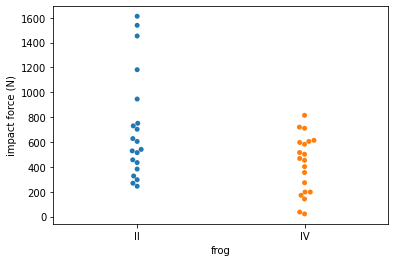

In [51]:
# === Look before you leap: EDA before hypothesis testing === #
# Make bee swarm plot
_ = sns.swarmplot(x="ID", y="impact_force", data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [ ]:
# === Match up data sets to exercise === #
force_a = df[df["ID"] == "II"]
force_b = df[df["ID"] == "IV"]

In [ ]:
# === Permutation test on frog data === #

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = data_1.mean() - data_2.mean()

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

---

### Interview questions

#### Data Science Interview Questions

* What are 5 predictions you have for the next 20 years?
* What is survivorship bias and why is it important?
* What layers make up a CNN?
* Explain how you'd design an experiment to determine user behavior.
* How are extrapolation and interpolation different?

#### Strategies

* Spend more time digging into how things work, rather than only how to apply them


---

### Coding, algorithms & data structures

---

### Engineering

---

### Machine learning

---
---

## Meta-data: read & write